# Top 50 Most Expensive Football Transfers

<b>Data Source:<b> https://www.kaggle.com/berkayalan/the-most-expensive-football-transfers
<br>
<b>By:<b> Andrew Woodruff

### Problem Statement
<p>Answer the following questions<p>
- Which Clubs have spent the most on players?<br>
- Who are the top 5 most expensive transfers? <br>
- What position costs the most? <br>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv('football_players.csv')
print(df.head())

   Rank    Origin             Player From(Country)       From(Club)  \
0     1    Brazil             Neymar         Spain        Barcelona   
1     2    France      Kylian Mbappé        France           Monaco   
2     3    Brazil  Philippe Coutinho       England        Liverpool   
3     4  Portugal         João Félix      Portugal          Benfica   
4     5    France  Antoine Griezmann         Spain  Atlético Madrid   

  To(Country)             To(Club)    Position  Fee(€ mln) Fee(£ mln)  Year  \
0      France  Paris Saint-Germain     Forward       222.0       £198  2017   
1      France  Paris Saint-Germain     Forward       180.0       £163  2018   
2       Spain            Barcelona  Midfielder       145.0       £105  2018   
3       Spain      Atlético Madrid     Forward       126.0     £104.1  2019   
4       Spain            Barcelona     Forward       120.0       £107  2019   

   Born  
0  1992  
1  1998  
2  1992  
3  1999  
4  1991  


In [90]:
df.dtypes

Rank               int64
Origin            object
Player            object
From(Country)     object
From(Club)        object
To(Country)       object
To(Club)          object
Position          object
Fee(€ mln)       float64
Fee(£ mln)        object
Year               int64
Born               int64
dtype: object

Lets take a quick look at where our data points lay. We must use a scatter plot instead of a line plot because our data is discrete. 

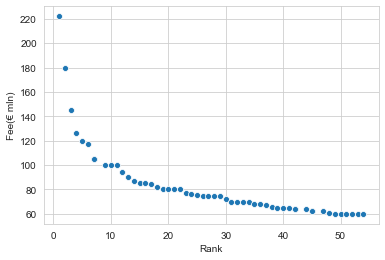

In [91]:
ax = sns.scatterplot(x='Rank', y='Fee(€ mln)', data=df)

### Question #2

In [105]:
df_sorted=df.sort_values(by=['Fee(€ mln)'], ascending=False)

print(df_sorted[['Player', 'Fee(€ mln)', 'Origin', 'Year']].head())

              Player  Fee(€ mln)    Origin  Year
0             Neymar       222.0    Brazil  2017
1      Kylian Mbappé       180.0    France  2018
2  Philippe Coutinho       145.0    Brazil  2018
3         João Félix       126.0  Portugal  2019
4  Antoine Griezmann       120.0    France  2019


## Setting up Groups to see how different factors impact transfer cost

In this section, I grouped the data by the multiple descriptors that were available and then averaged the cost of the transfers. I also sorted the values, though if we graph the data this was not neccessary. 

In [92]:
df4  = df.groupby(['From(Country)']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df5  = df.groupby(['From(Club)']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df6  = df.groupby(['To(Country)']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df7  = df.groupby(['To(Club)']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df8  = df.groupby(['Position']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df11 = df.groupby(['Year']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)
df12 = df.groupby(['Born']).mean().sort_values(by=['Fee(€ mln)'], ascending=False)

### Setting up plot format

In [93]:
sns.set_style('whitegrid')
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

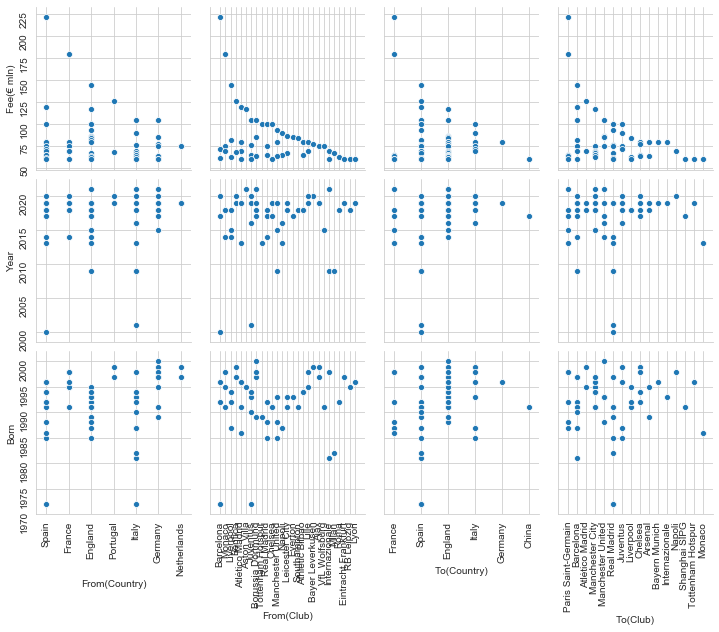

In [94]:
ax=sns.pairplot(df, 
             x_vars=['From(Country)','From(Club)','To(Country)','To(Club)'],
             y_vars=['Fee(€ mln)', 'Year', 'Born'])
for ax in ax.axes.flatten():
    ax.tick_params(rotation = 90)

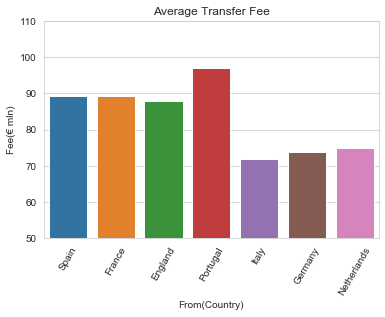

In [95]:
ax = sns.barplot(data=df, x='From(Country)', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax = plt.ylim(50, 110)
ax = plt.title('Average Transfer Fee')

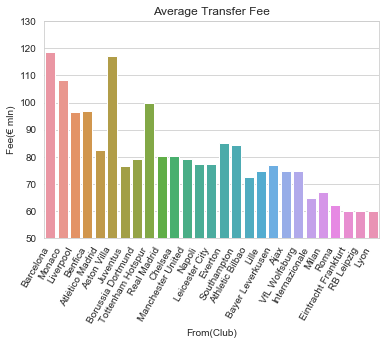

In [96]:
ax = sns.barplot(data=df, x='From(Club)', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='right')
ax = plt.ylim(50, 130)
ax = plt.title('Average Transfer Fee')

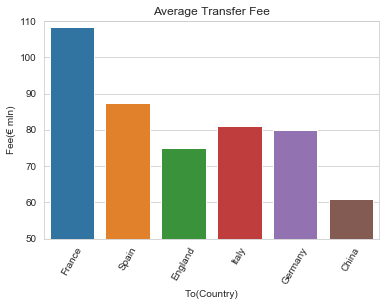

In [97]:
ax = sns.barplot(data=df, x='To(Country)', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax = plt.ylim(50, 110)
ax = plt.title('Average Transfer Fee')

### Question #1

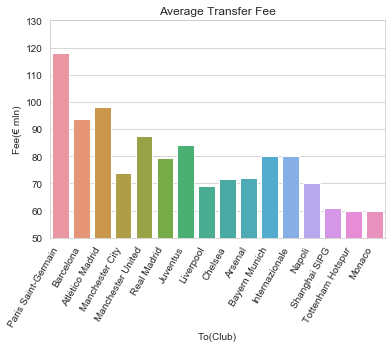

In [98]:
ax = sns.barplot(data=df, x='To(Club)', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
ax = plt.ylim(50, 130)
ax = plt.title('Average Transfer Fee')

### Question #3

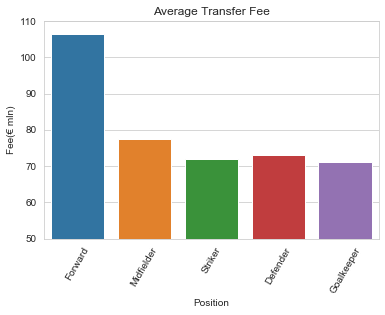

In [99]:
ax = sns.barplot(data=df, x='Position', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax = plt.ylim(50, 110)
ax = plt.title('Average Transfer Fee')

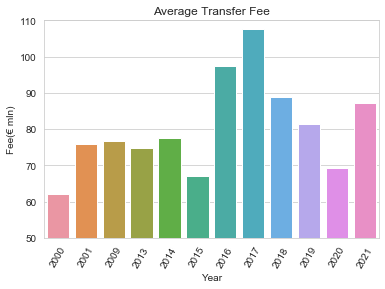

In [100]:
ax = sns.barplot(data=df, x='Year', y='Fee(€ mln)', ci=None)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax = plt.ylim(50, 110)
ax = plt.title('Average Transfer Fee')